## Brain Tumor Prediction

## Project Objective

## Build a Machine learning model to check the  influence of various factors and predict the Brain tumor in a patient

## Data Description

1.Unnamed 0: Index column

2.Area: Area of the tumor detected in mm

3.Perimeter: The perimeter of the tumor detected

4.Convex Area: The area of the convex hull covering the tumor 

5.Solidity: Solidity of the brain tissue. More solidity, higher the chance of having a tumor

6.Equivalent Diameter: Diameter of the tumor

7.Major axis, Minor axis : axis information required for finding the stage of the tumor

8.Eccentricity: Elongation or roundness of the tumor indicating the severity/ aggressiveness

9.Class: Target variable, 1- Tumor detected, 0- No tumor detected




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score,ConfusionMatrixDisplay
from sklearn.feature_selection import RFE,RFECV
from sklearn.feature_selection import SelectKBest, f_classif
from mlxtend.feature_selection import SequentialFeatureSelector

In [2]:
df=pd.read_csv(r"C:\Users\Keyush\Desktop\python points\machine-learning-material\ai_elite16\Brain-tumor-detection.csv")
df

,Unnamed: 0,Area,Perimeter,Convex Area,Solidity,Equivalent Diameter,Major Axis,Minor Axis,Eccentricity,Class
0,0,6314.5,521.972649,9855.5,0.640708,89.665328,86.297539,146.952896,(8.439724311699382e-17+1.3783115780934465j),1
1,1,52776.5,1189.820409,59947.0,0.880386,259.224086,209.590240,405.861420,(1.015395044877726e-16+1.6582659515946696j),1
2,2,50232.5,1415.349410,69628.5,0.721436,252.899200,223.632736,373.077637,(8.176507178841775e-17+1.3353249581078526j),1
3,3,4486.0,275.622365,4741.5,0.946114,75.576138,64.818382,93.083397,(6.311037889163952e-17+1.0306707033502136j),1
4,4,145.0,92.083260,323.5,0.448223,13.587484,16.900970,28.915043,(8.50007943665633e-17+1.3881683180120858j),1
...,...,...,...,...,...,...,...,...,...,...
236,236,545.5,208.267025,1317.5,0.414042,26.354358,28.902472,64.973869,(1.2328363649866522e-16+2.0133745759920343j),0
237,237,902.0,232.166520,1444.5,0.624438,33.888967,30.549131,62.921772,(1.1025778731209189e-16+1.80064631514748j),0
238,238,3177.0,217.681239,3260.0,0.974540,63.600959,63.508198,66.241142,(1.815595306633918e-17+0.29650921521176654j),0
239,239,6103.0,1208.631593,51259.5,0.119061,88.150899,280.000031,285.934113,(1.2673089388466744e-17+0.20696725614749073j),0


## Exploratory Data Analysis

In [3]:
df

,Unnamed: 0,Area,Perimeter,Convex Area,Solidity,Equivalent Diameter,Major Axis,Minor Axis,Eccentricity,Class
0,0,6314.5,521.972649,9855.5,0.640708,89.665328,86.297539,146.952896,(8.439724311699382e-17+1.3783115780934465j),1
1,1,52776.5,1189.820409,59947.0,0.880386,259.224086,209.590240,405.861420,(1.015395044877726e-16+1.6582659515946696j),1
2,2,50232.5,1415.349410,69628.5,0.721436,252.899200,223.632736,373.077637,(8.176507178841775e-17+1.3353249581078526j),1
3,3,4486.0,275.622365,4741.5,0.946114,75.576138,64.818382,93.083397,(6.311037889163952e-17+1.0306707033502136j),1
4,4,145.0,92.083260,323.5,0.448223,13.587484,16.900970,28.915043,(8.50007943665633e-17+1.3881683180120858j),1
...,...,...,...,...,...,...,...,...,...,...
236,236,545.5,208.267025,1317.5,0.414042,26.354358,28.902472,64.973869,(1.2328363649866522e-16+2.0133745759920343j),0
237,237,902.0,232.166520,1444.5,0.624438,33.888967,30.549131,62.921772,(1.1025778731209189e-16+1.80064631514748j),0
238,238,3177.0,217.681239,3260.0,0.974540,63.600959,63.508198,66.241142,(1.815595306633918e-17+0.29650921521176654j),0
239,239,6103.0,1208.631593,51259.5,0.119061,88.150899,280.000031,285.934113,(1.2673089388466744e-17+0.20696725614749073j),0


## checking for datatypes

In [4]:
df.dtypes

Unnamed: 0               int64
Area                   float64
Perimeter              float64
Convex Area            float64
Solidity               float64
Equivalent Diameter    float64
Major Axis             float64
Minor Axis             float64
Eccentricity            object
Class                    int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           241 non-null    int64  
 1   Area                 241 non-null    float64
 2   Perimeter            241 non-null    float64
 3   Convex Area          241 non-null    float64
 4   Solidity             241 non-null    float64
 5   Equivalent Diameter  241 non-null    float64
 6   Major Axis           241 non-null    float64
 7   Minor Axis           241 non-null    float64
 8   Eccentricity         241 non-null    object 
 9   Class                241 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 19.0+ KB


In [6]:
df.nunique()

Unnamed: 0             241
Area                   185
Perimeter              187
Convex Area            185
Solidity               188
Equivalent Diameter    185
Major Axis             188
Minor Axis             188
Eccentricity           188
Class                    2
dtype: int64

In [7]:
df.dtypes

Unnamed: 0               int64
Area                   float64
Perimeter              float64
Convex Area            float64
Solidity               float64
Equivalent Diameter    float64
Major Axis             float64
Minor Axis             float64
Eccentricity            object
Class                    int64
dtype: object

## Structural errors

Removing the column unnamed as it is unwanted  in the dataset

In [8]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [9]:
def remove_parentheses(value):
    return re.sub(r'[()]', '', value)


df['Eccentricity'] = df['Eccentricity'].apply(remove_parentheses)

In [10]:
df

,Area,Perimeter,Convex Area,Solidity,Equivalent Diameter,Major Axis,Minor Axis,Eccentricity,Class
0,6314.5,521.972649,9855.5,0.640708,89.665328,86.297539,146.952896,8.439724311699382e-17+1.3783115780934465j,1
1,52776.5,1189.820409,59947.0,0.880386,259.224086,209.590240,405.861420,1.015395044877726e-16+1.6582659515946696j,1
2,50232.5,1415.349410,69628.5,0.721436,252.899200,223.632736,373.077637,8.176507178841775e-17+1.3353249581078526j,1
3,4486.0,275.622365,4741.5,0.946114,75.576138,64.818382,93.083397,6.311037889163952e-17+1.0306707033502136j,1
4,145.0,92.083260,323.5,0.448223,13.587484,16.900970,28.915043,8.50007943665633e-17+1.3881683180120858j,1
...,...,...,...,...,...,...,...,...,...
236,545.5,208.267025,1317.5,0.414042,26.354358,28.902472,64.973869,1.2328363649866522e-16+2.0133745759920343j,0
237,902.0,232.166520,1444.5,0.624438,33.888967,30.549131,62.921772,1.1025778731209189e-16+1.80064631514748j,0
238,3177.0,217.681239,3260.0,0.974540,63.600959,63.508198,66.241142,1.815595306633918e-17+0.29650921521176654j,0
239,6103.0,1208.631593,51259.5,0.119061,88.150899,280.000031,285.934113,1.2673089388466744e-17+0.20696725614749073j,0


In [11]:
df

,Area,Perimeter,Convex Area,Solidity,Equivalent Diameter,Major Axis,Minor Axis,Eccentricity,Class
0,6314.5,521.972649,9855.5,0.640708,89.665328,86.297539,146.952896,8.439724311699382e-17+1.3783115780934465j,1
1,52776.5,1189.820409,59947.0,0.880386,259.224086,209.590240,405.861420,1.015395044877726e-16+1.6582659515946696j,1
2,50232.5,1415.349410,69628.5,0.721436,252.899200,223.632736,373.077637,8.176507178841775e-17+1.3353249581078526j,1
3,4486.0,275.622365,4741.5,0.946114,75.576138,64.818382,93.083397,6.311037889163952e-17+1.0306707033502136j,1
4,145.0,92.083260,323.5,0.448223,13.587484,16.900970,28.915043,8.50007943665633e-17+1.3881683180120858j,1
...,...,...,...,...,...,...,...,...,...
236,545.5,208.267025,1317.5,0.414042,26.354358,28.902472,64.973869,1.2328363649866522e-16+2.0133745759920343j,0
237,902.0,232.166520,1444.5,0.624438,33.888967,30.549131,62.921772,1.1025778731209189e-16+1.80064631514748j,0
238,3177.0,217.681239,3260.0,0.974540,63.600959,63.508198,66.241142,1.815595306633918e-17+0.29650921521176654j,0
239,6103.0,1208.631593,51259.5,0.119061,88.150899,280.000031,285.934113,1.2673089388466744e-17+0.20696725614749073j,0


## Type casting

In [12]:
df['Eccentricity'] = df['Eccentricity'].apply(lambda x: complex(x))

In [13]:
df['Eccentricity_new'] = df['Eccentricity'].apply(lambda x: x.imag)

In [14]:
df.drop('Eccentricity',axis=1,inplace=True)

In [15]:
df

,Area,Perimeter,Convex Area,Solidity,Equivalent Diameter,Major Axis,Minor Axis,Class,Eccentricity_new
0,6314.5,521.972649,9855.5,0.640708,89.665328,86.297539,146.952896,1,1.378312
1,52776.5,1189.820409,59947.0,0.880386,259.224086,209.590240,405.861420,1,1.658266
2,50232.5,1415.349410,69628.5,0.721436,252.899200,223.632736,373.077637,1,1.335325
3,4486.0,275.622365,4741.5,0.946114,75.576138,64.818382,93.083397,1,1.030671
4,145.0,92.083260,323.5,0.448223,13.587484,16.900970,28.915043,1,1.388168
...,...,...,...,...,...,...,...,...,...
236,545.5,208.267025,1317.5,0.414042,26.354358,28.902472,64.973869,0,2.013375
237,902.0,232.166520,1444.5,0.624438,33.888967,30.549131,62.921772,0,1.800646
238,3177.0,217.681239,3260.0,0.974540,63.600959,63.508198,66.241142,0,0.296509
239,6103.0,1208.631593,51259.5,0.119061,88.150899,280.000031,285.934113,0,0.206967


## Missing Values

From below we can see that we donot have any missing values in the dataset

In [16]:
df.isnull().sum()

Area                   0
Perimeter              0
Convex Area            0
Solidity               0
Equivalent Diameter    0
Major Axis             0
Minor Axis             0
Class                  0
Eccentricity_new       0
dtype: int64

## Duplicates


In [17]:
df.duplicated().sum()

51

In [18]:
df.drop_duplicates(inplace=True) ## Dropping the duplicates

In [19]:
df.duplicated().sum() ## checking for duplicates

0

##  Statistical Summary

In [20]:
df.describe()

,Area,Perimeter,Convex Area,Solidity,Equivalent Diameter,Major Axis,Minor Axis,Class,Eccentricity_new
count,1.900000e+02,190.000000,1.900000e+02,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,1.523222e+04,527.502377,2.692173e+04,0.627155,72.329617,127.541023,250.244717,0.673684,1.759919
std,9.008024e+04,718.352894,1.001998e+05,0.305307,119.321545,218.235508,1012.400816,0.470103,2.483889
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.227500e+02,110.740114,4.731250e+02,0.417811,20.271060,17.834935,39.009347,0.000000,0.765453
50%,1.284250e+03,249.521859,2.503500e+03,0.694451,40.435636,47.482395,77.125595,1.000000,1.120094
75%,4.642750e+03,603.354900,1.037950e+04,0.901726,76.881499,158.806271,235.056065,1.000000,1.793589
max,1.164150e+06,4453.521314,1.172680e+06,0.997361,1217.473538,1797.920654,13210.791016,1.000000,28.144217


In [21]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Area,190.0,15232.223684,90080.240616,0.0,322.750000,1284.250000,4642.750000,1.164150e+06
Perimeter,190.0,527.502377,718.352894,0.0,110.740114,249.521859,603.354900,4.453521e+03
Convex Area,190.0,26921.731579,100199.765311,0.0,473.125000,2503.500000,10379.500000,1.172680e+06
Solidity,190.0,0.627155,0.305307,0.0,0.417811,0.694451,0.901726,9.973608e-01
Equivalent Diameter,190.0,72.329617,119.321545,0.0,20.271060,40.435636,76.881499,1.217474e+03
Major Axis,190.0,127.541023,218.235508,0.0,17.834935,47.482395,158.806271,1.797921e+03
Minor Axis,190.0,250.244717,1012.400816,0.0,39.009347,77.125595,235.056065,1.321079e+04
Class,190.0,0.673684,0.470103,0.0,0.000000,1.000000,1.000000,1.000000e+00
Eccentricity_new,190.0,1.759919,2.483889,0.0,0.765453,1.120094,1.793589,2.814422e+01


## Univariate Analysis

In [22]:
num_cols=df.select_dtypes(include=['int','float']).columns

Area
Skew : 11.49


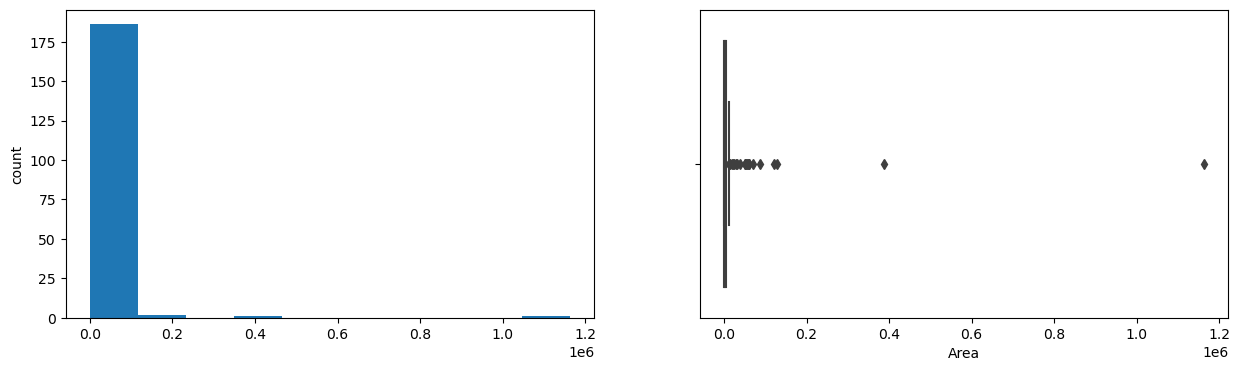

Perimeter
Skew : 2.78


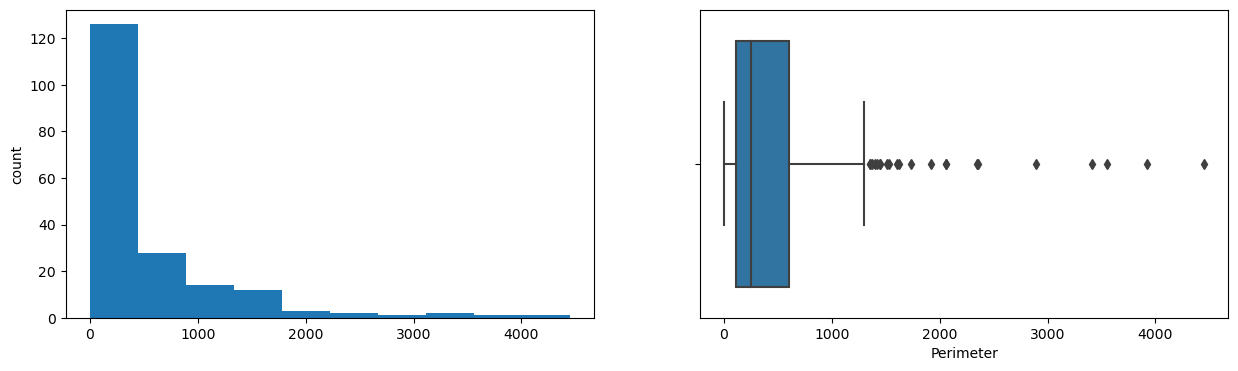

Convex Area
Skew : 8.87


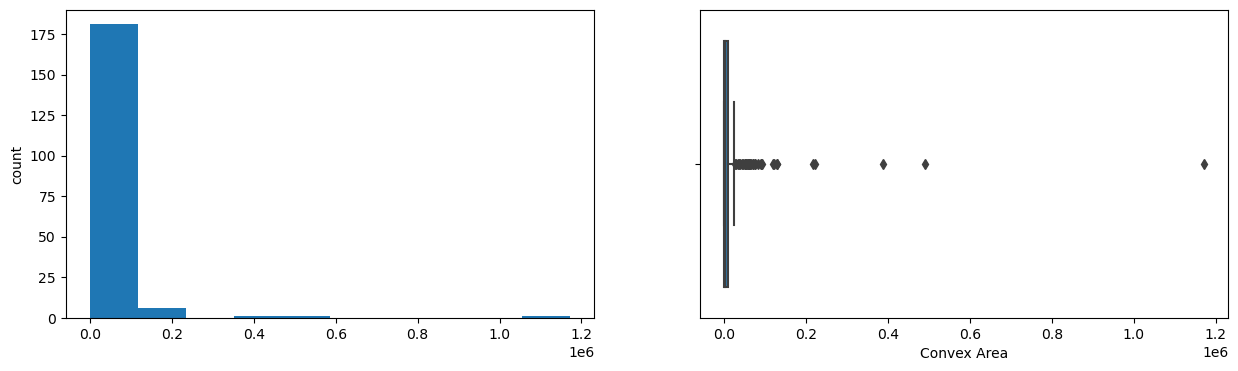

Solidity
Skew : -0.63


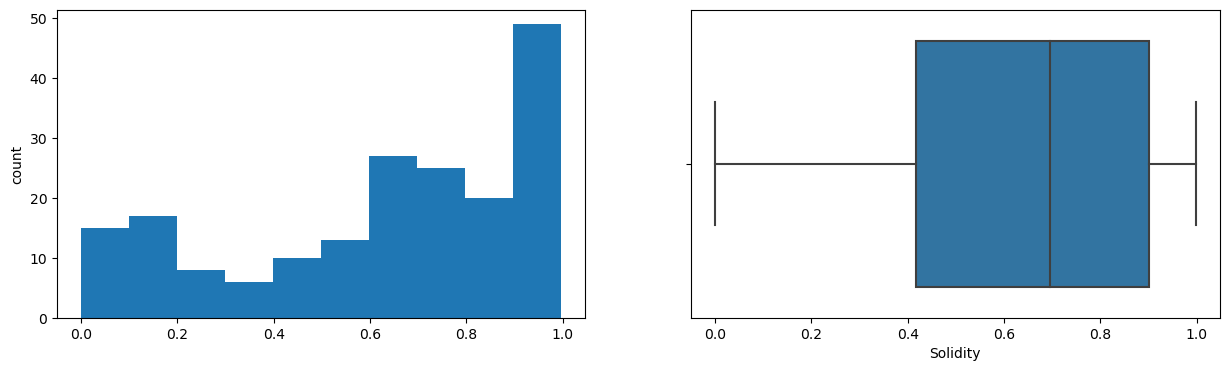

Equivalent Diameter
Skew : 5.97


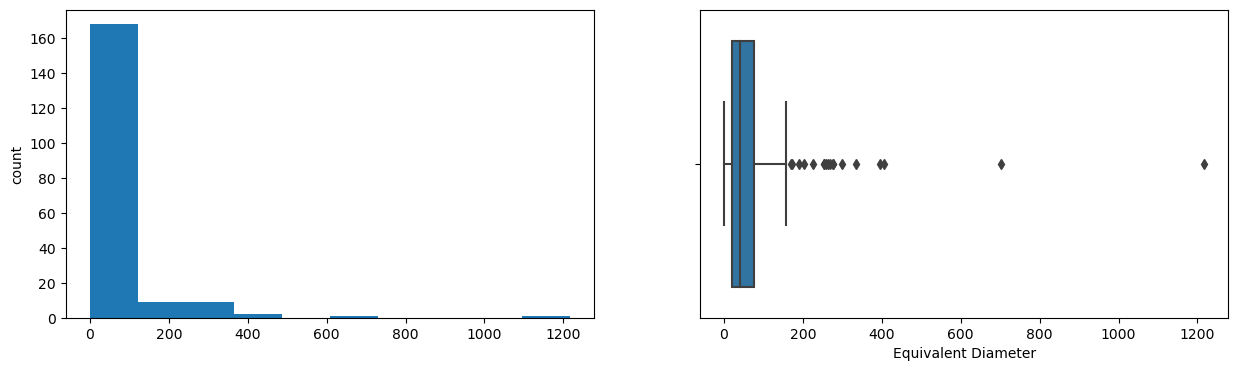

Major Axis
Skew : 4.31


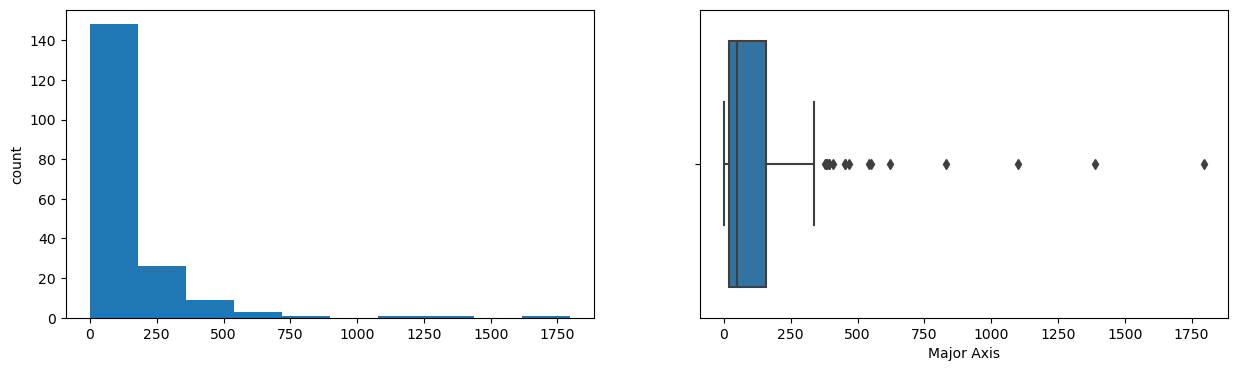

Minor Axis
Skew : 11.57


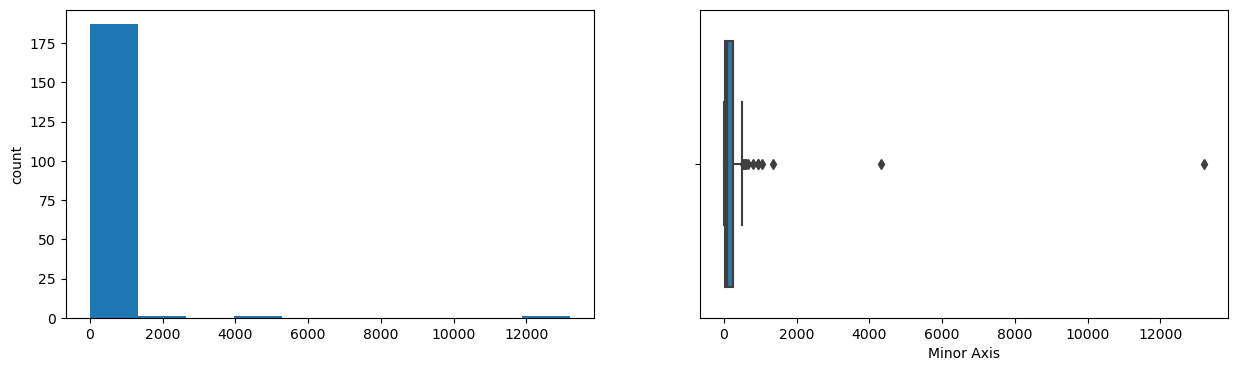

Class
Skew : -0.75


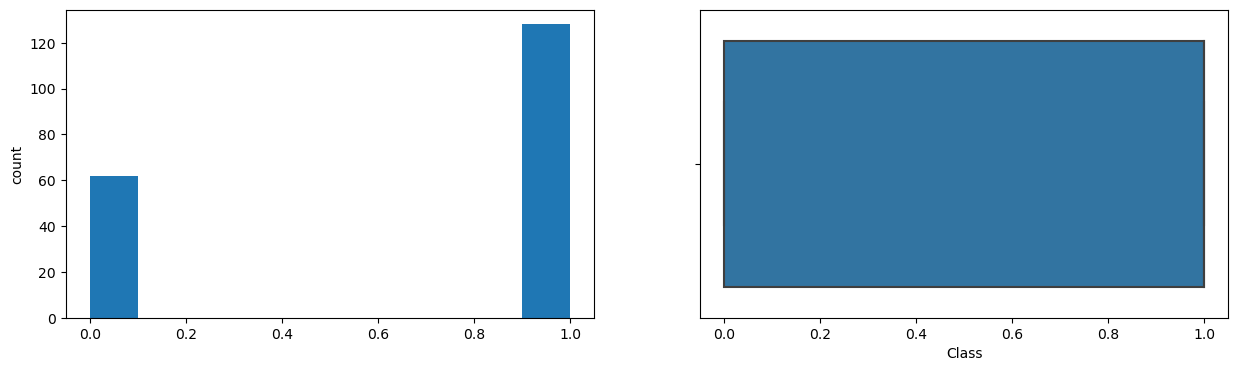

Eccentricity_new
Skew : 7.03


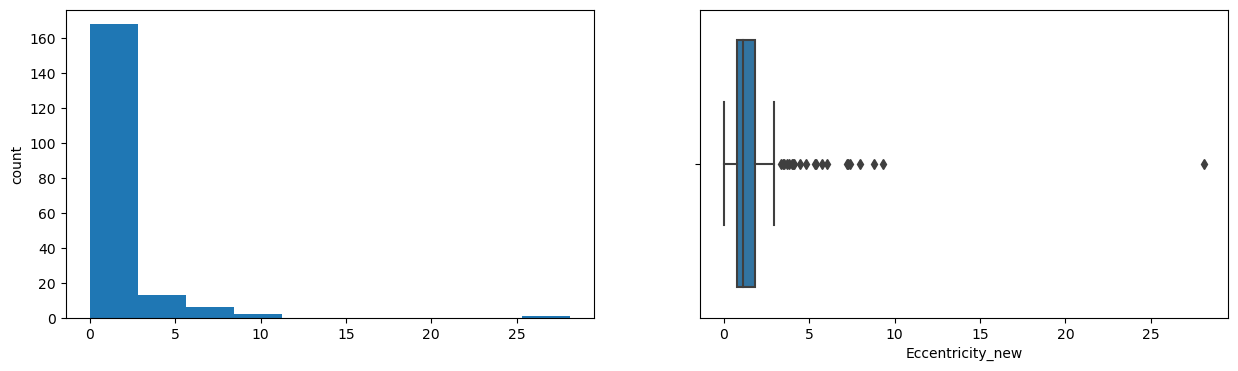

In [23]:
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()


## Insights from visualization

outliers are present in the columns Area,Perimeter,Convex Area,Equivalent Diameter,Major axis,Minor axis which needed to be handled

As from  the univariate analysis we have understood that data is not normally distributed so we apply Log transformation before we move into Bi variate analysis

## Transformation

Log transformation can help in normalization, so this variable can maintain standard scale with other variables

In [24]:
def log_transform(data,col):
    for colname in col:
        if (data[colname] == 1.0).all():
            data[colname + '_log'] = np.log(data[colname]+1)
        else:
            data[colname + '_log'] = np.log(data[colname])
    data.info()

In [25]:
log_transform(df,['Area','Perimeter','Convex Area','Solidity','Equivalent Diameter','Major Axis','Minor Axis'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 0 to 240
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area                     190 non-null    float64
 1   Perimeter                190 non-null    float64
 2   Convex Area              190 non-null    float64
 3   Solidity                 190 non-null    float64
 4   Equivalent Diameter      190 non-null    float64
 5   Major Axis               190 non-null    float64
 6   Minor Axis               190 non-null    float64
 7   Class                    190 non-null    int64  
 8   Eccentricity_new         190 non-null    float64
 9   Area_log                 190 non-null    float64
 10  Perimeter_log            190 non-null    float64
 11  Convex Area_log          190 non-null    float64
 12  Solidity_log             190 non-null    float64
 13  Equivalent Diameter_log  190 non-null    float64
 14  Major Axis_log           1

C:\Users\Keyush\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Keyush\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Keyush\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Keyush\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Keyush\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Keyush\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountere

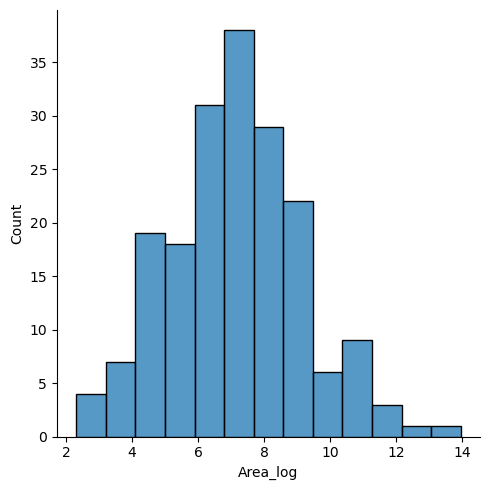

In [26]:
sns.displot(df["Area_log"])
plt.xlabel('Area_log')
plt.show()

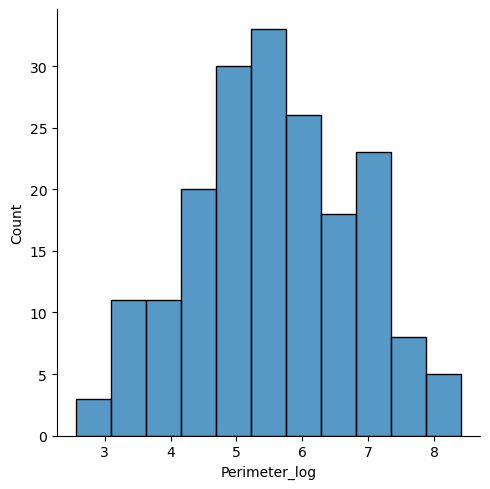

In [27]:
sns.displot(df["Perimeter_log"])
plt.xlabel('Perimeter_log')
plt.show()

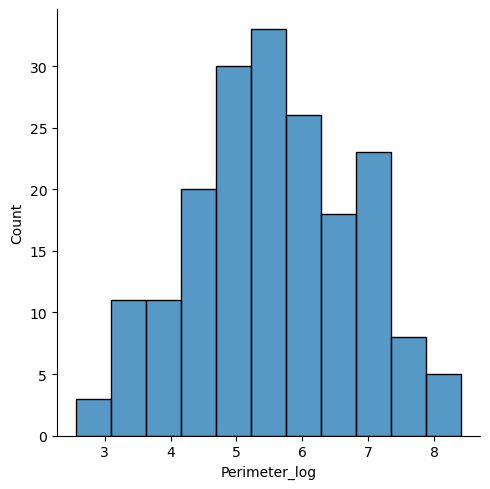

In [28]:
sns.displot(df["Perimeter_log"])
plt.xlabel('Perimeter_log')
plt.show()

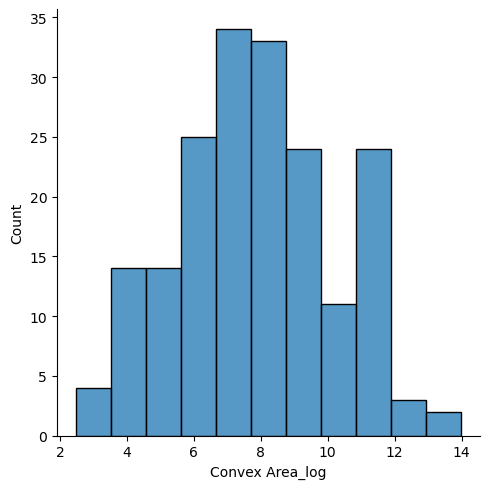

In [29]:
sns.displot(df["Convex Area_log"])
plt.xlabel('Convex Area_log')
plt.show()


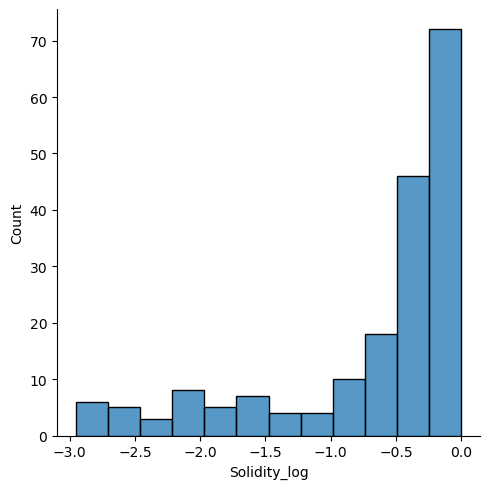

In [30]:
sns.displot(df["Solidity_log"])
plt.xlabel('Solidity_log')
plt.show()

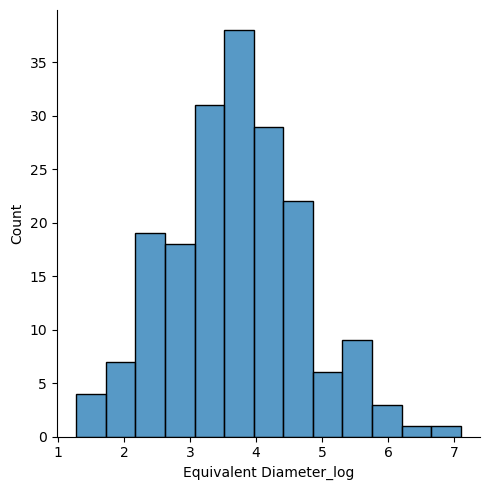

In [31]:
sns.displot(df["Equivalent Diameter_log"])
plt.xlabel('Equivalent Diameter_log')
plt.show()

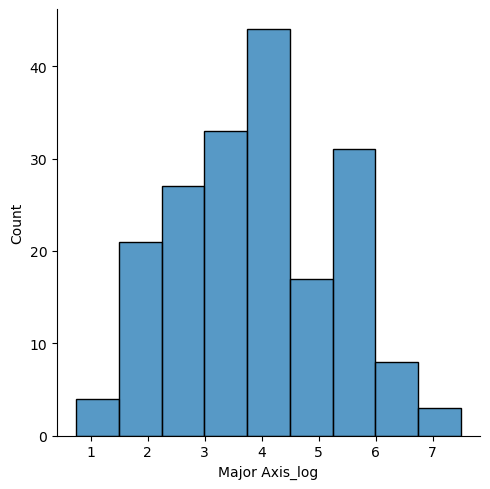

In [32]:
sns.displot(df["Major Axis_log"])
plt.xlabel('Major Axis_log')
plt.show()

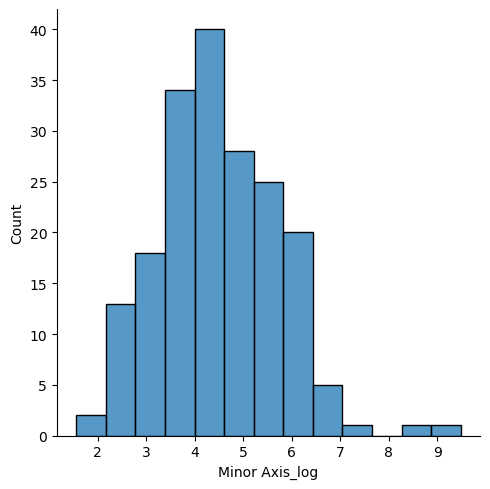

In [33]:
sns.displot(df["Minor Axis_log"])
plt.xlabel('Minor Axis_log')
plt.show()

## Bi variate analysis

Bivariate Analysis helps to understand how variables are related to each other and the relationship between dependent and independent variables present in the dataset.

For Numerical variables, Pair plots and Scatter plots are widely been used to do Bivariate Analysis.

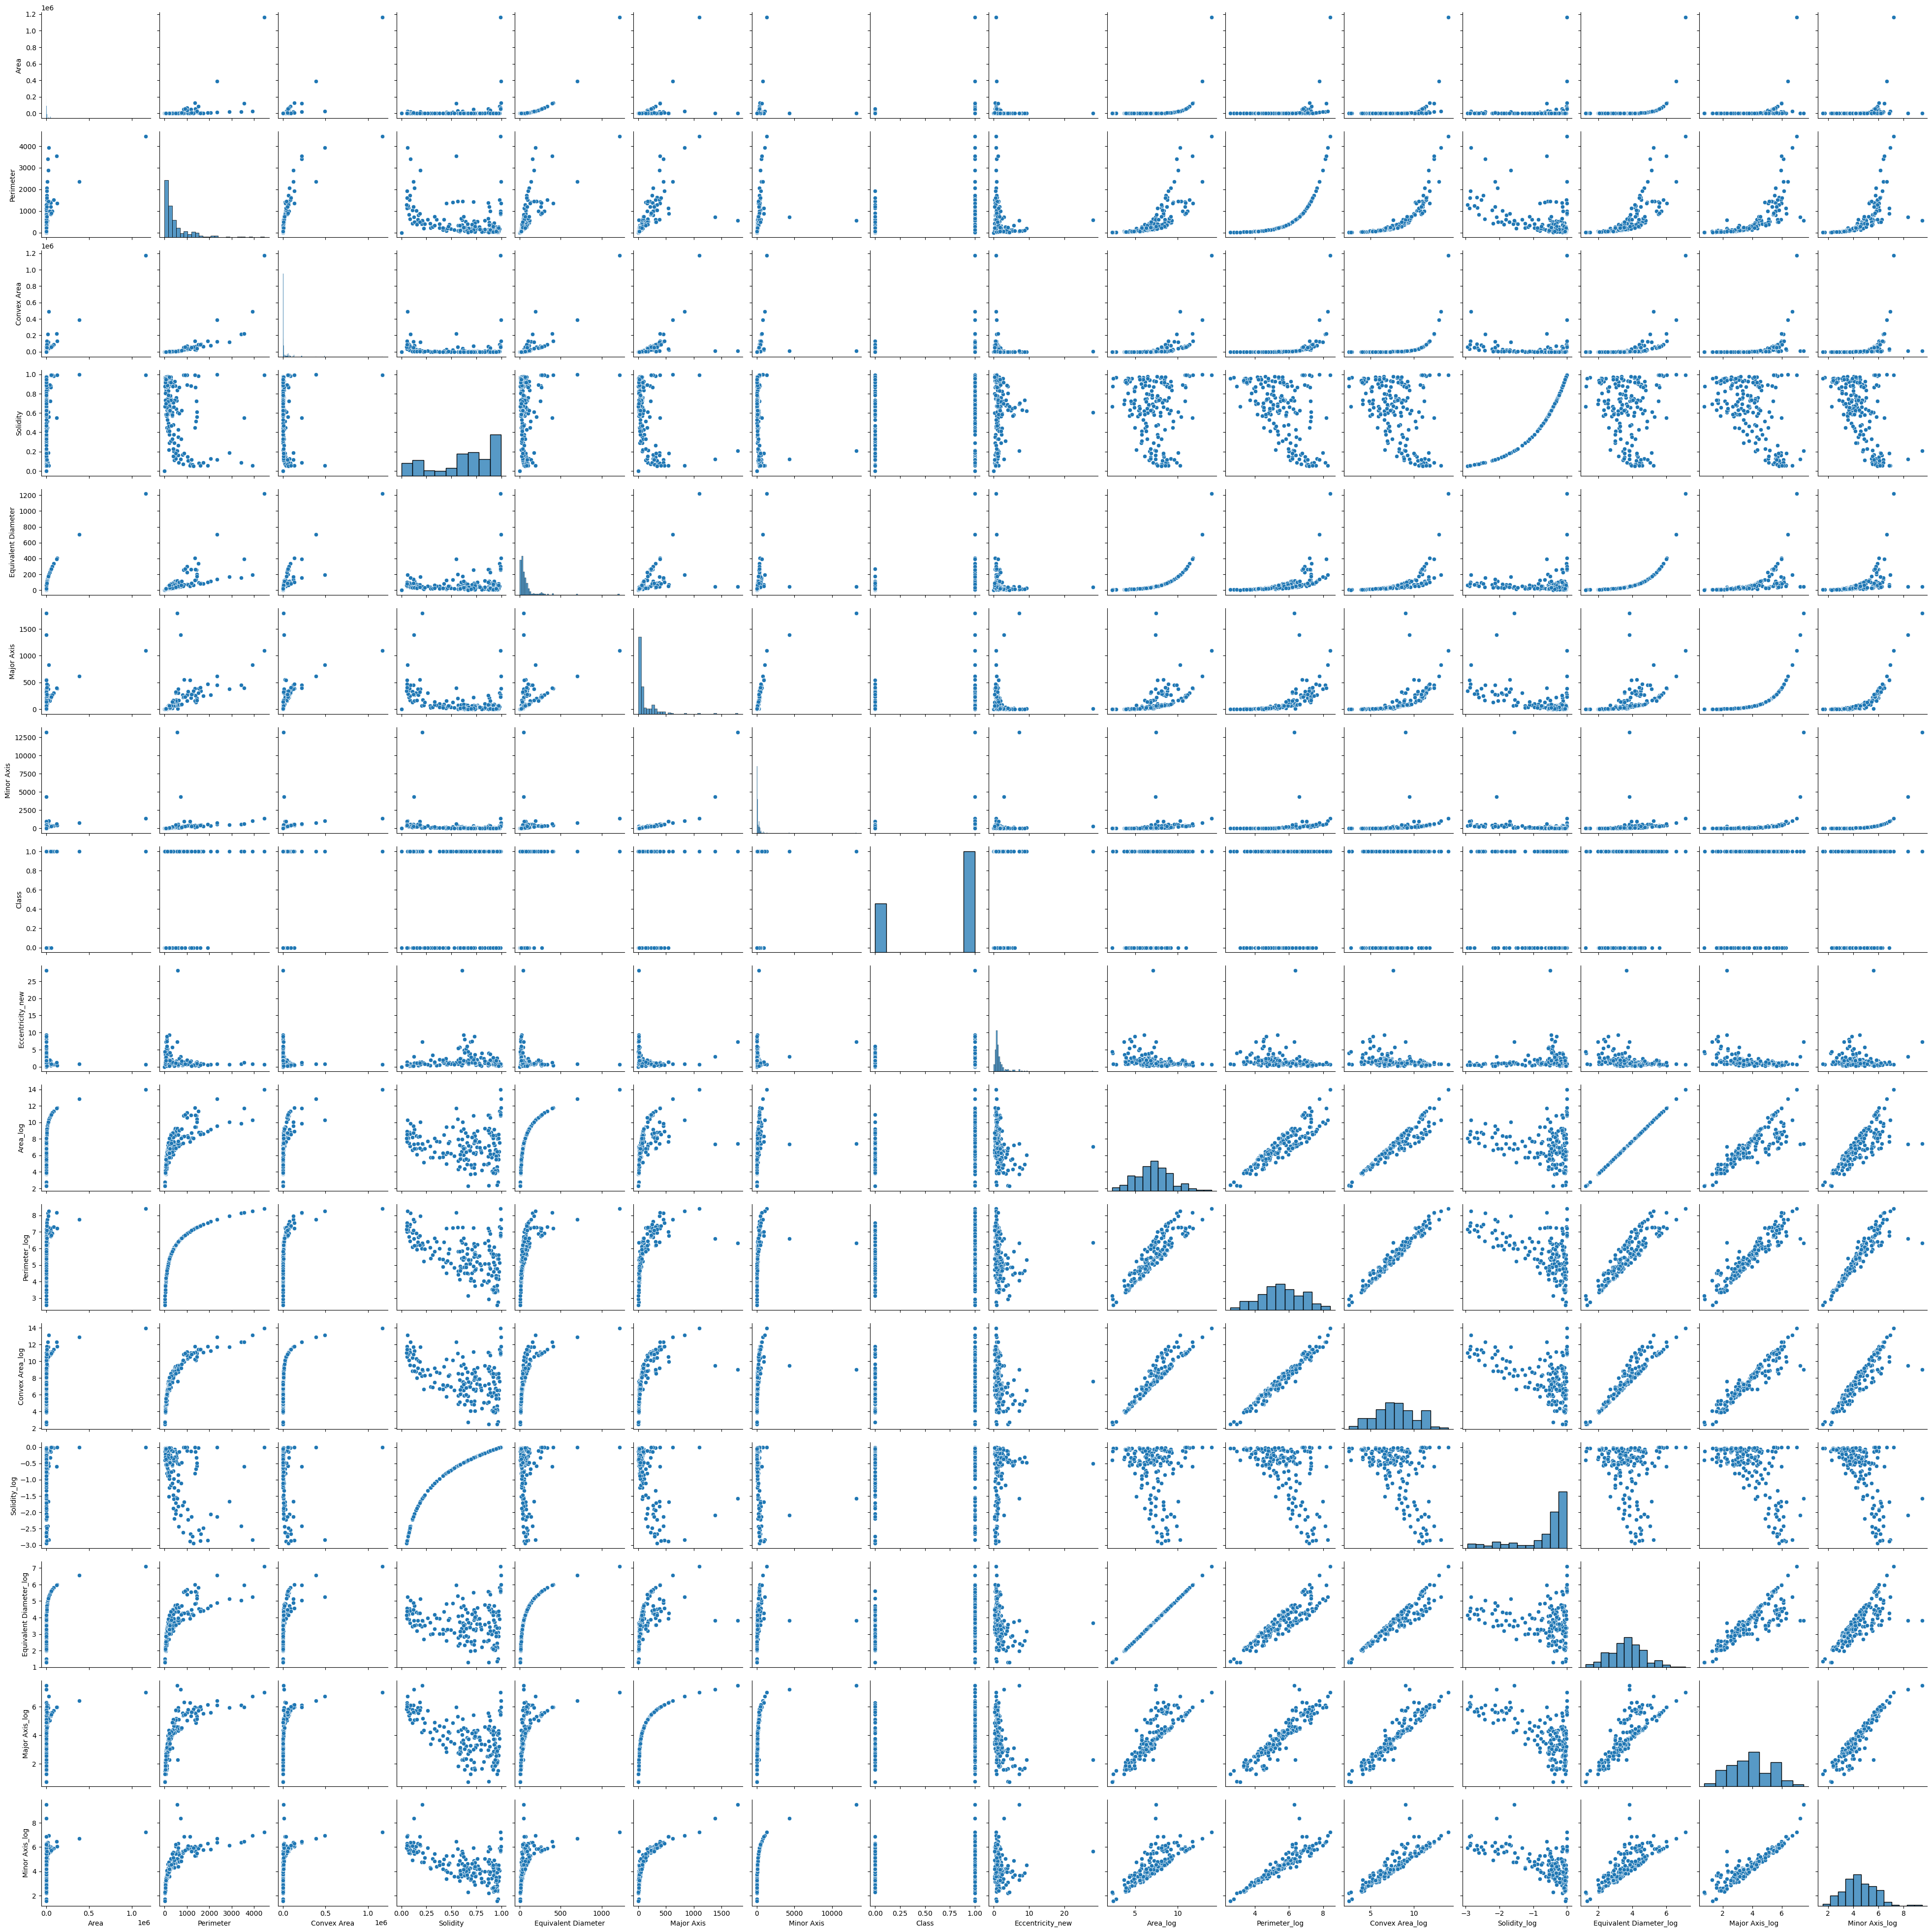

In [34]:
sns.pairplot(data=df)

## EDA Multivariate Analysis

Multivariate analysis looks at more than two variables. Multivariate analysis is one of the most useful methods to determine relationships and analyze patterns for any dataset.

A heat map is widely been used for Multivariate Analysis

Heat Map gives the correlation between the variables, whether it has a positive or negative correlation.

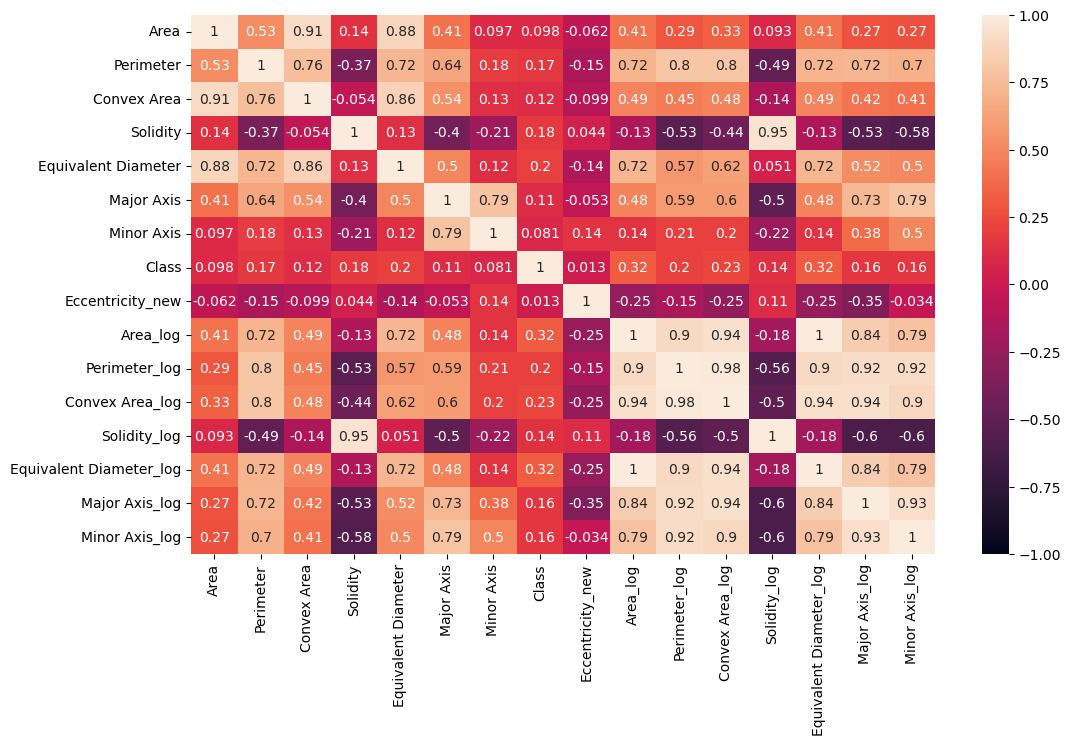

In [35]:
plt.figure(figsize=(12, 7))
sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

In [36]:
df.drop(['Area_log','Perimeter_log','Convex Area_log','Solidity_log','Equivalent Diameter_log','Major Axis_log','Minor Axis_log'],inplace=True,axis=1)

In [37]:
df

,Area,Perimeter,Convex Area,Solidity,Equivalent Diameter,Major Axis,Minor Axis,Class,Eccentricity_new
0,6314.5,521.972649,9855.5,0.640708,89.665328,86.297539,146.952896,1,1.378312
1,52776.5,1189.820409,59947.0,0.880386,259.224086,209.590240,405.861420,1,1.658266
2,50232.5,1415.349410,69628.5,0.721436,252.899200,223.632736,373.077637,1,1.335325
3,4486.0,275.622365,4741.5,0.946114,75.576138,64.818382,93.083397,1,1.030671
4,145.0,92.083260,323.5,0.448223,13.587484,16.900970,28.915043,1,1.388168
...,...,...,...,...,...,...,...,...,...
236,545.5,208.267025,1317.5,0.414042,26.354358,28.902472,64.973869,0,2.013375
237,902.0,232.166520,1444.5,0.624438,33.888967,30.549131,62.921772,0,1.800646
238,3177.0,217.681239,3260.0,0.974540,63.600959,63.508198,66.241142,0,0.296509
239,6103.0,1208.631593,51259.5,0.119061,88.150899,280.000031,285.934113,0,0.206967


## Feature Engineering

## checking for relation between input and  output features

In [38]:
f1=df['Area']  ## weak correlation
f2=df['Class']

In [39]:
correlation1= np.corrcoef(f1, f2)[0, 1]

In [40]:
correlation1

0.09821411736169094

In [41]:
f3=df['Perimeter']
f4=df['Class']

In [42]:
correlation2=np.corrcoef(f3, f4)[0, 1]

In [43]:
correlation2

0.1654650531699229

In [44]:
f5=df['Convex Area']
f6=df['Class']

In [45]:
correlation3=np.corrcoef(f5, f6)[0, 1]

In [46]:
correlation3

0.11578668306929293

In [47]:
f7=df['Solidity']
f8=df['Class']

In [48]:
correlation4=np.corrcoef(f7, f8)[0, 1]

In [49]:
correlation4

0.1779290023505782

In [50]:
f9=df['Equivalent Diameter']
f10=df['Class']

In [51]:
correlation5=np.corrcoef(f9, f10)[0, 1]

In [52]:
correlation5

0.20300982572604145

In [53]:
f11=df['Major Axis']
f12=df['Class']

In [54]:
correlation6=np.corrcoef(f11, f12)[0, 1]

In [55]:
correlation6

0.11343042079725958

In [56]:
f13=df['Minor Axis'] ## weak correlation
f14=df['Class']

In [57]:
correlation7=np.corrcoef(f13, f14)[0, 1]

In [58]:
correlation7

0.08080964274921161

In [59]:
f15=df['Eccentricity_new']
f16=df['Class']

In [60]:
correlation8=np.corrcoef(f15, f16)[0, 1]## weak correlation

In [61]:
correlation8

0.012960482510480186

In [62]:
## As the relationship is meager between Area,Minor Axis  with respect to output feature Class,so dropping the column Area and Minor Axis

In [63]:
df=df.drop(['Area','Minor Axis','Eccentricity_new'],axis=1)

In [64]:
df

,Perimeter,Convex Area,Solidity,Equivalent Diameter,Major Axis,Class
0,521.972649,9855.5,0.640708,89.665328,86.297539,1
1,1189.820409,59947.0,0.880386,259.224086,209.590240,1
2,1415.349410,69628.5,0.721436,252.899200,223.632736,1
3,275.622365,4741.5,0.946114,75.576138,64.818382,1
4,92.083260,323.5,0.448223,13.587484,16.900970,1
...,...,...,...,...,...,...
236,208.267025,1317.5,0.414042,26.354358,28.902472,0
237,232.166520,1444.5,0.624438,33.888967,30.549131,0
238,217.681239,3260.0,0.974540,63.600959,63.508198,0
239,1208.631593,51259.5,0.119061,88.150899,280.000031,0


In [65]:
## checking  for relation between input and input features

In [66]:
feature1=df['Perimeter']
feature2=df['Convex Area']

In [67]:
c1=np.corrcoef(feature1, feature2)[0, 1]

In [68]:
c1

0.7649267547840046

In [69]:
feature3=df['Perimeter']
feature4=df['Solidity']

In [70]:
c2=np.corrcoef(feature3, feature4)[0, 1]

In [71]:
c2

-0.37289136119382227

In [72]:
feature5=df['Perimeter']
feature6=df['Equivalent Diameter']

In [73]:
c3=np.corrcoef(feature5, feature6)[0, 1]

In [74]:
c3

0.7211623230870552

In [75]:
feature7=df['Perimeter']
feature8=df['Major Axis']

In [76]:
c4=np.corrcoef(feature7, feature8)[0, 1]

In [77]:
c4

0.6425256916146251

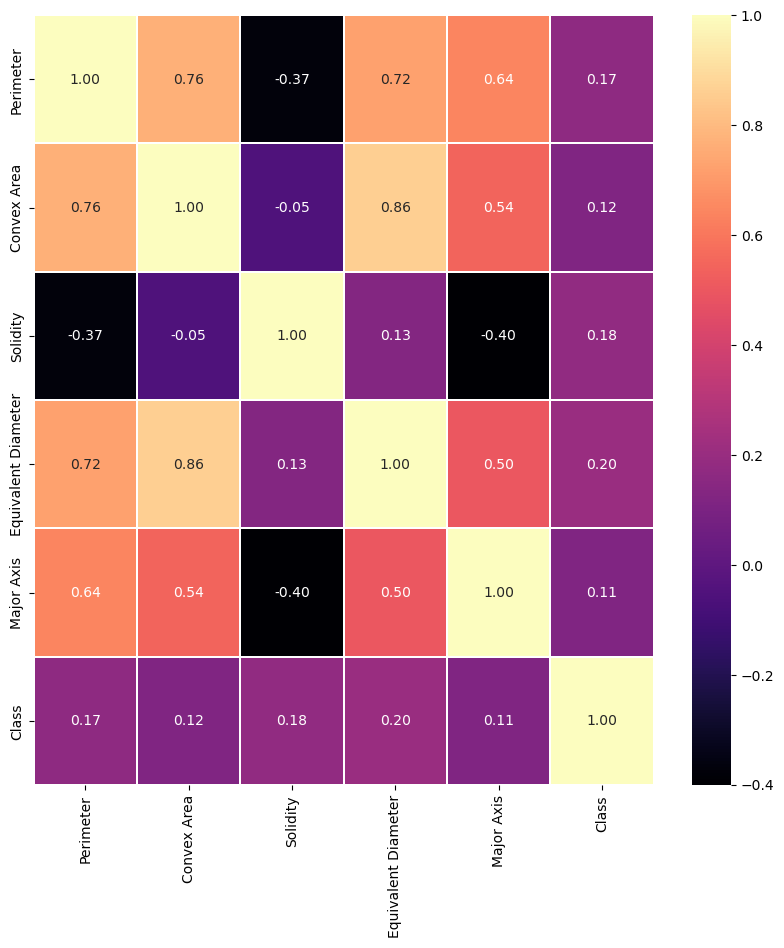

In [78]:
fig,ax = plt.subplots(figsize=(10, 10))   
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma") # the color intensity is based on 
plt.show()

In [79]:
def log_transform_except_target(df1):
    df_transformed = df1.copy()

    for column in df_transformed.columns:
        if column != 'Class':
            df_transformed[column] = np.log(df_transformed[column] + 1)  # Applying log transformation
    return df_transformed

log_transformer = FunctionTransformer(func=log_transform_except_target)
log_transformed= log_transformer.transform(df)
log_transformed

,Perimeter,Convex Area,Solidity,Equivalent Diameter,Major Axis,Class
0,6.259529,9.195886,0.495128,4.507175,4.469322,1
1,7.082398,11.001233,0.631477,5.561543,5.349914,1
2,7.255838,11.150944,0.543159,5.536937,5.414467,1
3,5.622653,8.464320,0.665835,4.338286,4.186899,1
4,4.533494,5.782286,0.370337,2.680164,2.884855,1
...,...,...,...,...,...,...
236,5.343611,7.184250,0.346452,3.308876,3.397941,0
237,5.451753,7.276211,0.485162,3.552171,3.451546,0
238,5.387615,8.089789,0.680335,4.168229,4.166792,0
239,7.098071,10.844676,0.112490,4.490330,5.638355,0


## Model Buiding

In [80]:
X=log_transformed.drop('Class',axis=1)
y=log_transformed['Class']

In [81]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=43)

In [82]:
gnb = GaussianNB()

In [83]:
gnb.fit(X_train,y_train)

GaussianNB()

In [84]:
##y_pred=gnb.predict(X_test)

In [85]:
##acc=accuracy_score(y_pred,y_test)

In [86]:
##acc

In [87]:
##print(classification_report(y_pred,y_test))

In [88]:
##ConfusionMatrixDisplay(confusion_matrix(y_pred,y_test)).plot()

In [89]:
##confusion_matrix(y_pred,y_test)

In [90]:
from sklearn.pipeline import Pipeline

##  creating a pickle file


In [91]:
import pickle

In [92]:
pickle.dump(gnb,open('btp.pkl','wb'))

In [93]:
import os
os.getcwd()

'C:\\Users\\Keyush\\Desktop\\python points\\machine-learning-material\\ai_elite16'

In [94]:
predict=pickle.load(open("btp.pkl",'rb'))